<a href="https://colab.research.google.com/github/ShabnaIlmi/Bank-Marketing-Random-Forest-and-Neural-Networks/blob/main/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the necessary libraries**

In [248]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [249]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the dataset**

In [250]:
# Loading the dataset with the proper delimiter (semicolon)
data = pd.read_csv('/content/drive/MyDrive/Bank-Marketing-Random-Forest-and-Neural-Networks/bank-additional-full.csv', delimiter=';')

In [251]:
# Displaying the data contained within the dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **Data Analyzation**

In [252]:
# Display dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.

In [253]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [254]:
# Categorical features
print("\nCategorical Features:")
print(categorical_cols)


Categorical Features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [255]:
# Displaying the unique values and their counts relevant to each categorical column
for col in categorical_cols:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
 
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
 
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
 
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
 
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
 
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
 
contact
cellular     26144
telephone    15044
Name: coun

In [256]:
# Displaying the total count of missing values and their respective columns which contains categorical data
# Creating an empty list
unknown_values = []

# Checking for 'unknown' values in categorical columns
for col in categorical_cols:
    unknown_count = (data[col] == 'unknown').sum()
    if unknown_count > 0:
        unknown_values.append({'Column': col, 'Count': unknown_count})

# Converting the list into a pandas DataFrame
unknown_values_df = (
    pd.DataFrame(unknown_values)
    .sort_values(by='Count', ascending=False)
    .reset_index(drop=True)
)

# Displaying the DataFrame
print("\nColumns with 'unknown' values and their counts:")
print()
print(unknown_values_df)


Columns with 'unknown' values and their counts:

      Column  Count
0    default   8597
1  education   1731
2    housing    990
3       loan    990
4        job    330
5    marital     80


In [257]:
# Displaying the unique values and their counts relevant to each column containing "unknown" values
for _, row in unknown_values_df.iterrows():
    col = row['Column']
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
 
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
 
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
 
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
 
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
 
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
 


In [258]:
# Numerical features
print("\nNumerical Features:")
print(numerical_cols)


Numerical Features:
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [259]:
# Displaying the unique values and their count in the numerical columns
for col in numerical_cols:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64
 
duration
90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: count, Length: 1544, dtype: int64
 
campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64
 
pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
1

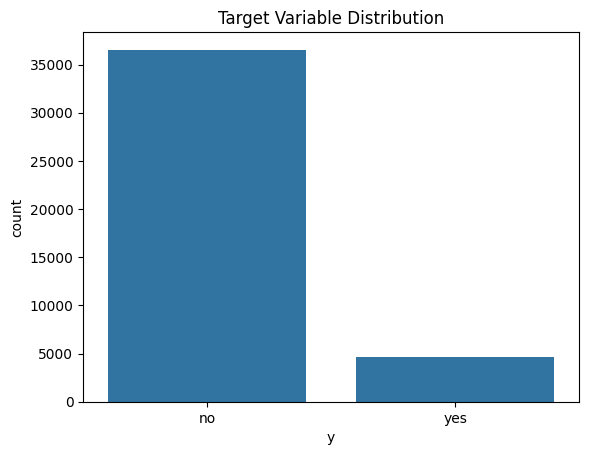

In [260]:
# Visualizing the distribution of the target variable
sns.countplot(data=data, x='y')
plt.title('Target Variable Distribution')
plt.show()

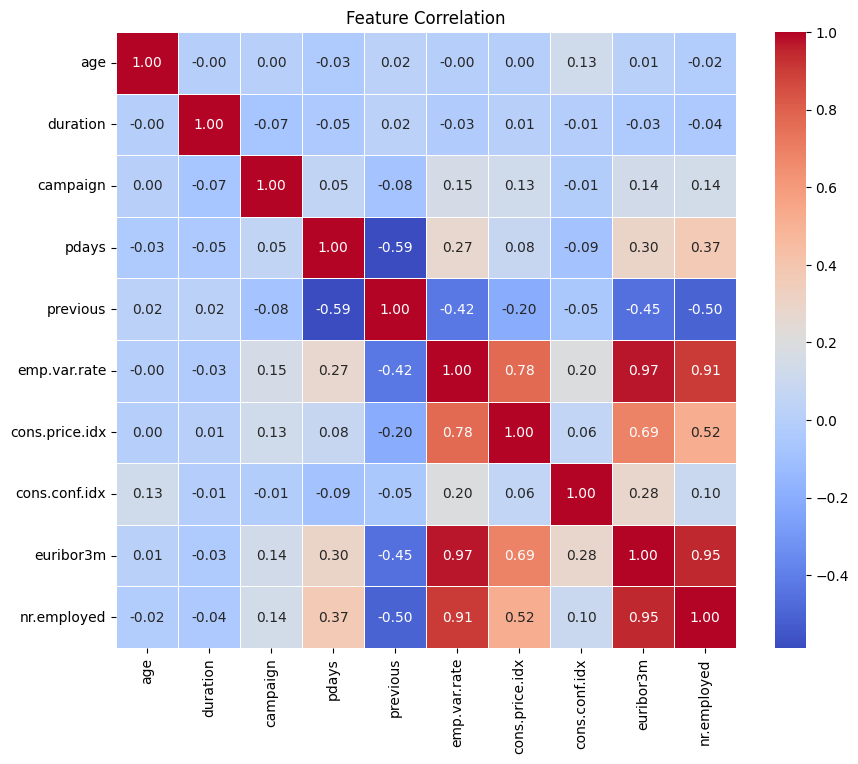

In [261]:
# Select only numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation')
plt.show()

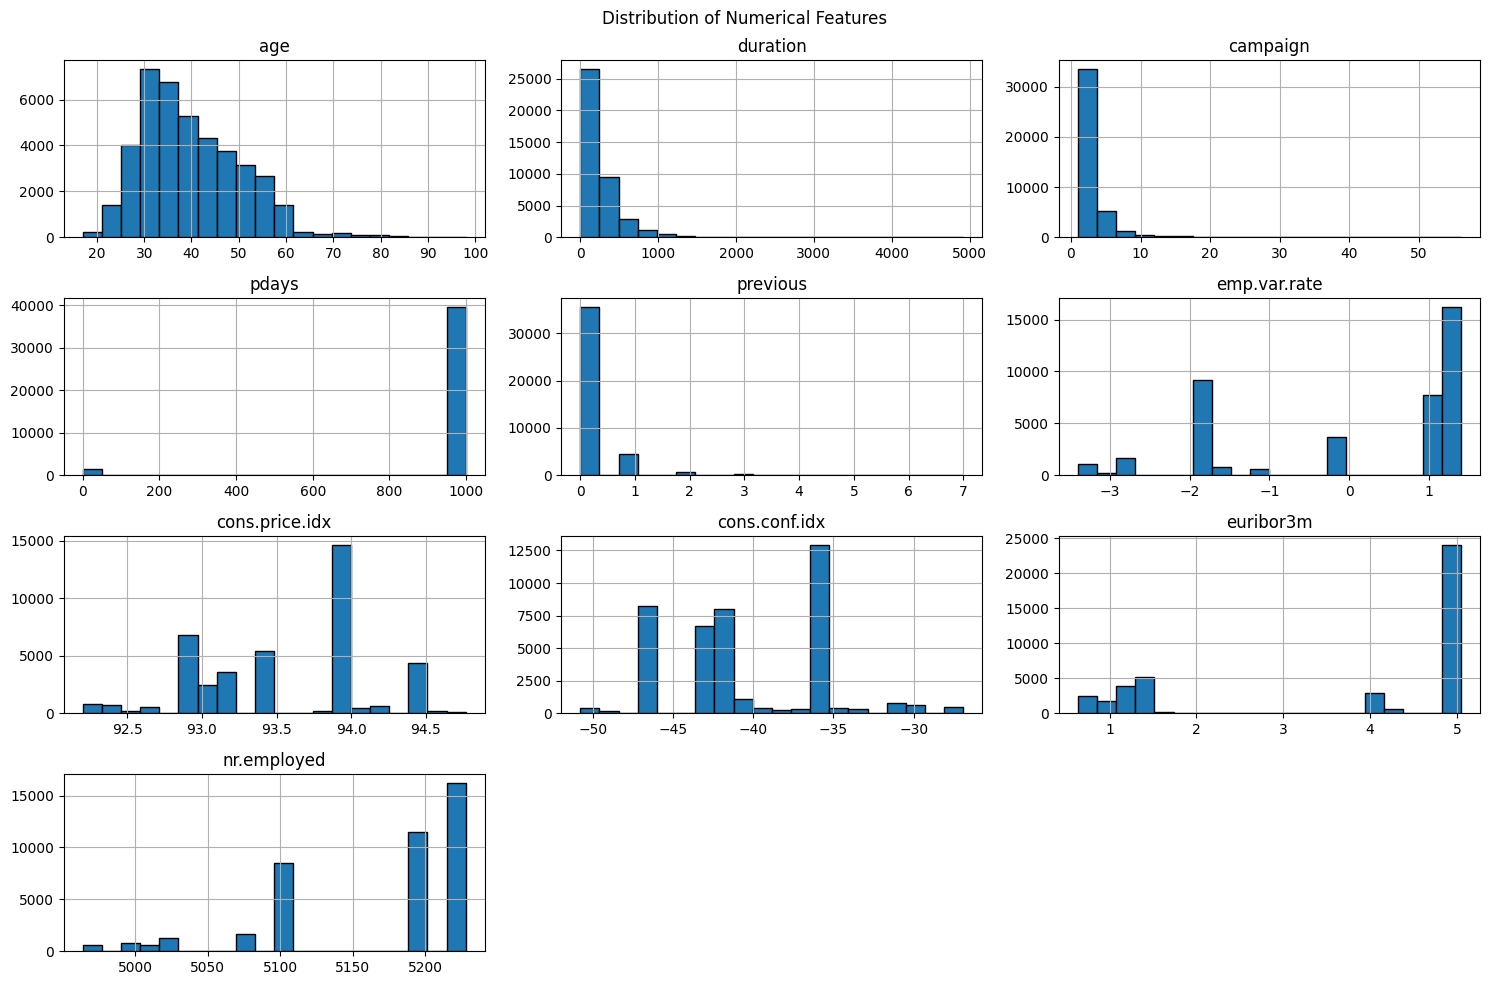

In [262]:
# Visualizing the distribution of numerical columns
# Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms for all numerical columns
data[numerical_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

In [263]:
# Analyzing each column individually
def analyze_columns(data):
    # Create a list to store summary rows
    summary_rows = []

    for col in data.columns:
        unique_values = data[col].unique()
        n_unique = len(unique_values)
        missing_count = data[col].isnull().sum()
        examples = unique_values[:5] if n_unique > 5 else unique_values

        # Append a dictionary to the list
        summary_rows.append({
            "Column": col,
            "Data Type": data[col].dtype,
            "Unique Values": n_unique,
            "Missing Values": missing_count,
            "Examples": examples
        })

    # Combine rows into a DataFrame
    summary = pd.DataFrame(summary_rows)
    return summary

# Perform column-wise analysis
column_summary = analyze_columns(data)

# Analyze individual columns
for col in data.columns:
    print(f"\nAnalyzing Column: {col}")
    print(f"Data Type: {data[col].dtype}")
    print(f"Unique Values: {data[col].nunique()}")
    print(f"Missing Values: {data[col].isnull().sum()}")
    print(f"Top 5 Most Frequent Values:\n{data[col].value_counts().head()}")


Analyzing Column: age
Data Type: int64
Unique Values: 78
Missing Values: 0
Top 5 Most Frequent Values:
age
31    1947
32    1846
33    1833
36    1780
35    1759
Name: count, dtype: int64

Analyzing Column: job
Data Type: object
Unique Values: 12
Missing Values: 0
Top 5 Most Frequent Values:
job
admin.         10422
blue-collar     9254
technician      6743
services        3969
management      2924
Name: count, dtype: int64

Analyzing Column: marital
Data Type: object
Unique Values: 4
Missing Values: 0
Top 5 Most Frequent Values:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Analyzing Column: education
Data Type: object
Unique Values: 8
Missing Values: 0
Top 5 Most Frequent Values:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
Name: count, dtype: int64

Analyzing Column: default
Data Type: object
Unique Values: 3
Miss

# **Data Preprocessing**

### **Cleaning the dataset**

In [264]:
# Step 1: Removing whitespaces from object type columns
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [265]:
# Step 2: Removing unnecessary full stops(".") from the 'job' column
data['job'] = data['job'].apply(lambda x: x.replace('.', '') if isinstance(x, str) else x)

In [266]:
# Step 3: Removing duplicates values
print(f"Initial dataset shape: {data.shape}")
data = data.drop_duplicates()
print(f"Shape after removing duplicates: {data.shape}")

Initial dataset shape: (41188, 21)
Shape after removing duplicates: (41176, 21)


### **Handling "unknown" values**

In [267]:
# step 4: Handling "unknown" values in the categorical columns

# Categorical columns to specifically handle with the mode
columns_to_handle_with_mode = ['marital', 'default', 'housing', 'loan']

In [268]:
# step 5: Replacing "unknown" with NaN for imputation
data[columns_to_handle_with_mode] = data[columns_to_handle_with_mode].replace('unknown', np.nan)

**Replacing the missing ("unknown values changed to NaN for imputation") data contained within the "loan" column with the mode ("no") since the mode represents more than 80% of this column this is considered as the most optimal choice to handle those missing values. Additionally, missing values in the columns, martial and housing also replaced with the mode since more than 60% of those columns also consists of the mode and those columns has comparably less number of missing values.**

In [269]:
# step 6: Replacing NaN with the mode (most frequent value) in the specified columns
for col in columns_to_handle_with_mode:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)

In [270]:
# Verifying the changes and checking for the columns which contain 'unknown' values
print("\nColumns with 'unknown' values and their counts:\n")
for _, row in unknown_values_df.drop_duplicates(subset='Column').iterrows():
    col = row['Column']
    # Count the number of "unknown" values in the column
    unknown_count = data[col].str.contains('unknown', case=False, na=False).sum()
    if unknown_count > 0:
        print(f"{col} : {unknown_count}")


Columns with 'unknown' values and their counts:

education : 1730
job : 330


**Considering the missing values in the columns, "job" and "education" as a seperate category during the encoding process**

**Handling missing values in the numerical columns**

In [271]:
# step 7: Checking for missing values in numerical columns
missing_info = {}

for col in numerical_cols:
    missing_count = data[col].isna().sum()
    if missing_count > 0:
        missing_info[col] = missing_count
        # Replacing the missing values in the numerical columns with the median
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)

if missing_info:
    print("Missing values found in the following numerical columns:")
    for col, count in missing_info.items():
        print(f"Column '{col}': {count} missing value(s).")
else:
    print("No missing values found in the numerical columns.")

No missing values found in the numerical columns.


# **Data Encoding**

**Encoding the non-ordinal categorical variables using one-hot encoding**

In [272]:
# Step 8: Encoding the categorical colums

# One-hot encoding for non-ordinal categorical variables
non_ordinal_cols = ['job', 'marital', 'contact', 'poutcome', 'month', 'day_of_week']
data = pd.get_dummies(data, columns=non_ordinal_cols, drop_first=True)

**Encoding the ordinal categorical variables using labeled encoding**

In [273]:
# Updated Label Encoding Map
label_encoding_map = {
    'default': {'no': 0, 'yes': 1},
    'education': {
       'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3, 'basic.9y': 4, 'high.school': 5, 'professional.course': 6, 'university.degree': 7, 'unknown': 0
    },
    'housing': {'yes': 0, 'no': 1},
    'loan': {'no': 0, 'yes': 1},
}

# Apply label encoding
for column, mapping in label_encoding_map.items():
    data[column] = data[column].map(mapping)

# Display the first few rows to verify encoding
print(data.head())

   age  education  default  housing  loan  duration  campaign  pdays  \
0   56          2        0        1     0       261         1    999   
1   57          5        0        1     0       149         1    999   
2   37          5        0        0     0       226         1    999   
3   40          3        0        1     0       151         1    999   
4   56          5        0        1     1       307         1    999   

   previous  emp.var.rate  ...  month_jun  month_mar  month_may  month_nov  \
0         0           1.1  ...      False      False       True      False   
1         0           1.1  ...      False      False       True      False   
2         0           1.1  ...      False      False       True      False   
3         0           1.1  ...      False      False       True      False   
4         0           1.1  ...      False      False       True      False   

  month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0     False      Fals

**Excluding the "duration" feature to avoid data leakage, as it directly depends on the outcome**

In [274]:
# Excluding the 'duration' feature for realistic predictive modeling
data = data.drop(columns=['duration'])

**Excluding the "default" column since one case (" no ") dominates more than 90% of that column**

In [275]:
# Excluding the 'default' column since more than 90% of the data in the column is dominated by the value "no"
data = data.drop(columns=['default'])

In [276]:
# Step 9: Scaling numerical features
numerical_cols = [
    'age', 'campaign', 'previous', 'emp.var.rate',
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [277]:
# Step 10: Feature Engineering
# Creating an additional column by combing the columns 'pdays' and 'previous'
data['contact_score'] = data.apply(lambda row: (1 / (row['pdays'] + 1)) * row['previous'] if row['pdays'] != 999 else 0, axis=1)

**Excluding the 'pdays' and the 'previous' features since an additional feature called the 'contact_score' is created by combining them**

In [278]:
# Excluding the 'pdays' and the 'previous' columns
data = data.drop(columns=['pdays', 'previous'])

In [279]:
# Step 11: Encoding the target variable (y)
data['y'] = data['y'].map({'yes': 1, 'no': 0})

**Since 'emp.var.rate' and 'nr.employed' columns have high correlation which is 0.91. This will lead into multicollinearity in the datset. In order to avoid this one column from these two should be dropped. The column which is being dropped is selected by considering the correlations of the columns to the 'y' variable**

In [280]:
# Step 12: Feature Selection
# Checking the correlation of the 'emp.var.rate' and the 'nr.employed' to the target variable
correlation_emp_var_rate = data['emp.var.rate'].corr(data['y'])
correlation_nr_employed = data['nr.employed'].corr(data['y'])

print("Correlation with 'y' for 'emp.var.rate':", correlation_emp_var_rate)
print("Correlation with 'y' for 'nr.employed':", correlation_nr_employed)

Correlation with 'y' for 'emp.var.rate': -0.298288504246207
Correlation with 'y' for 'nr.employed': -0.35466901538267304


**Since both the columns have a moderate amount of correlation with the target variable when considering the domain knowledge of both the columns it is approriate considering dropping the 'emp.var.rate' column since the 'nr.employed' reflect economic trends over time and more directly related to customer behavior than the 'emp.var.rate'.**

In [282]:
# Excluding the 'nr.employement' column
data = data.drop(columns=['emp.var.rate'])

KeyError: "['emp.var.rate'] not found in axis"

In [283]:
# Step 13: Splitting features and target
X = data.drop(columns=['y'])
y = data['y']

In [284]:
# Step 14: Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
# Step 15: Save processed data for model training if needed
X_train.to_csv('/content/drive/MyDrive/banking_system/processed_X_train.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/banking_system/processed_y_train.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/banking_system/processed_X_test.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/banking_system/processed_y_test.csv', index=False)

# **Balancing the Target Variable**

In [286]:
# Analyzing the distribution of the target variable
y_train.value_counts(normalize=True)

,proportion
y,
0,0.888646
1,0.111354


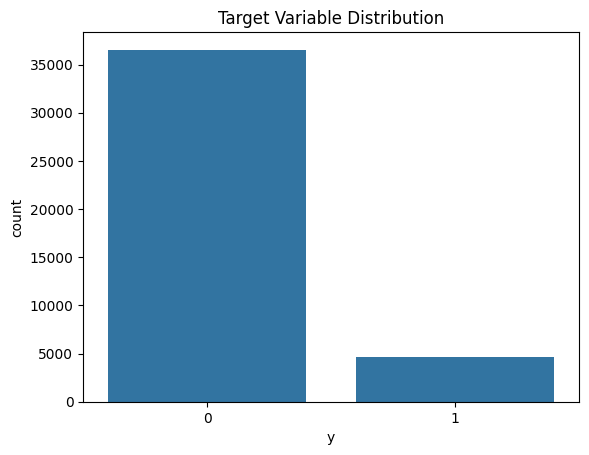

In [287]:
# Visualizing the distribution of the target variable
sns.countplot(data=data, x='y')
plt.title('Target Variable Distribution')
plt.show()

In [288]:
# Display dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41176 non-null  float64
 1   education             41176 non-null  int64  
 2   housing               41176 non-null  int64  
 3   loan                  41176 non-null  int64  
 4   campaign              41176 non-null  float64
 5   cons.price.idx        41176 non-null  float64
 6   cons.conf.idx         41176 non-null  float64
 7   euribor3m             41176 non-null  float64
 8   nr.employed           41176 non-null  float64
 9   y                     41176 non-null  int64  
 10  job_blue-collar       41176 non-null  bool   
 11  job_entrepreneur      41176 non-null  bool   
 12  job_housemaid         41176 non-null  bool   
 13  job_management        41176 non-null  bool   
 14  job_retired           41176 non-null  bool   
 15  job

In [289]:
# Import necessary modules
from sklearn.utils.validation import validate_data
from imblearn.over_sampling import SMOTE
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Handling imbalanced dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

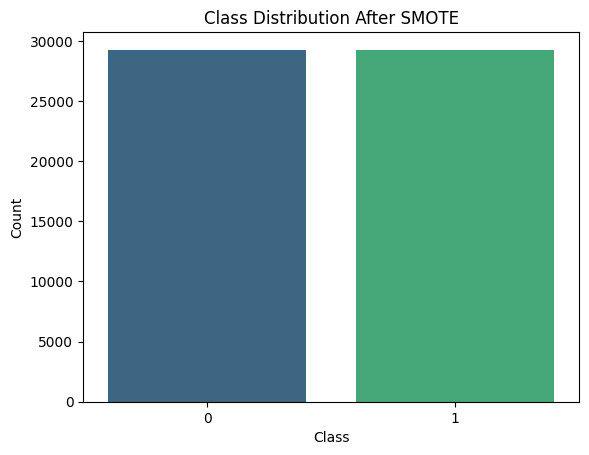

In [290]:
# Plot class distribution after SMOTE
sns.countplot(x=y_train_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [291]:
# Displaying the dataset shape after applying the SMOTE
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of y_train_resampled: {y_train_resampled.shape}")

Shape of X_train_resampled: (58544, 39)
Shape of y_train_resampled: (58544,)


# **Building the Models**

In [292]:
# Standardize the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## **Model based on Random Forest**

In [293]:
# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

from sklearn.neural_network import MLPClassifier

# Compute class weights
class_weights = {0: len(y_train) / (2 * (y_train == 0).sum()),
                 1: len(y_train) / (2 * (y_train == 1).sum())}

In [294]:
# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [295]:
# Accuracy and Classification Report for Random Forest
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Evaluation:
Accuracy: 0.8711753278290433

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      7265
           1       0.45      0.38      0.41       971

    accuracy                           0.87      8236
   macro avg       0.68      0.66      0.67      8236
weighted avg       0.86      0.87      0.87      8236



## **Model based on Neural Networks**

In [296]:
# Initialize Neural Network with adjusted class weights
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42, solver='adam')

# Manually apply class weights
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights based on the target variable
nn_model.fit(X_train_resampled, y_train_resampled)

MLPClassifier(max_iter=500, random_state=42)

In [297]:
# Neural Network Predictions
y_pred_nn = nn_model.predict(X_test)
y_pred_proba_nn = nn_model.predict_proba(X_test)[:, 1]

In [298]:
# Accuracy and Classification Report for Neural Network
print("Neural Network Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))

Neural Network Model Evaluation:
Accuracy: 0.8200582807187955

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      7265
           1       0.30      0.41      0.35       971

    accuracy                           0.82      8236
   macro avg       0.61      0.64      0.62      8236
weighted avg       0.84      0.82      0.83      8236



# **ROC-AUC Score and ROC Curve**

In [299]:
# ROC-AUC Scores
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

print(f"Random Forest ROC-AUC: {roc_auc_rf}")
print(f"Neural Network ROC-AUC: {roc_auc_nn}")

Random Forest ROC-AUC: 0.7657262257214201
Neural Network ROC-AUC: 0.7033566689324193


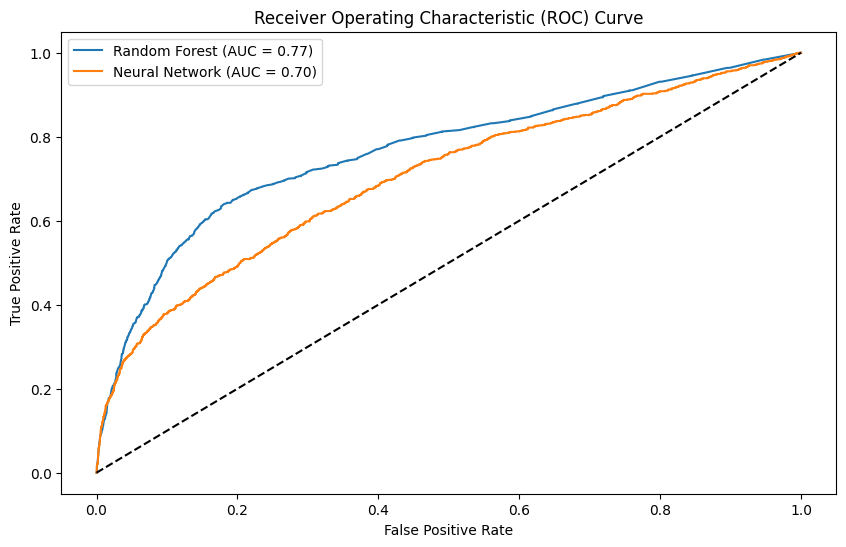

In [300]:
# Plotting ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()